#**YouTube Channel Performance Secrets**

# Project Objective

This project aims to understand what makes YouTube channels perform well. We will analyze data to find out what helps videos succeed, get more subscribers, and make money. We will use data science techniques to find useful tips and build a predictive model to forecast key metrics such as estimated revenue or subscriber growth based on the analyzed historical data.

## Data loading

Load the data from "youtube_channel_real_performance_analytics.csv" into a dataframe.



Import the pandas library and load the CSV file into a DataFrame, then display the first 5 rows.



In [30]:
import pandas as pd

df = pd.read_csv('youtube_channel_real_performance_analytics.csv')
display(df.head())

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


## Data exploration

Explore the data to understand its structure, missing values, and initial distributions of key metrics like views, subscribers, etc.
and descriptive statistics of numerical columns.



In [31]:
# Print the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

# Generate information for dataframe
print("\nInformation for the DataFrame:")
print(df.info())

# Generate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
display(df.describe())

Shape of the DataFrame: (364, 70)

Data types of each column:
ID                           int64
Video Duration             float64
Video Publish Time          object
Days Since Publish           int64
Day                          int64
                            ...   
Watch Time (hours)         float64
Subscribers                float64
Estimated Revenue (USD)    float64
Impressions                float64
Video Thumbnail CTR (%)    float64
Length: 70, dtype: object

Missing values per column:
ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64

Information for the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column       

,ID,Video Duration,Days Since Publish,Day,Month,Year,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,3.640000e+02,364.000000
mean,181.500000,664.239011,8.406593,15.807692,6.642857,2018.736264,0.112283,8934.711538,1.553734,1.059005,...,0.824176,0.008242,45.970989,285.612637,128800.101648,10058.965455,321.024725,8.852052,9.595286e+05,7.914615
std,105.221988,330.646183,15.371239,8.924004,3.421521,2.530629,0.179668,12967.843236,1.078549,0.728380,...,9.053369,0.090534,12.457470,116.595678,118209.844270,9516.160361,444.594763,13.414650,1.180519e+06,2.903383
min,0.000000,9.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,15.050000,8.000000,2461.000000,12.697900,-3.000000,0.000000,3.222800e+04,0.620000
25%,90.750000,496.000000,3.000000,8.000000,4.000000,2017.000000,0.015000,349.500000,0.817750,0.522000,...,0.000000,0.000000,40.252500,233.750000,27160.500000,2759.404250,41.000000,0.443250,1.317082e+05,6.420000
50%,181.500000,613.000000,5.000000,16.000000,7.000000,2018.000000,0.050000,3564.000000,1.540500,1.155500,...,0.000000,0.000000,45.465000,286.500000,101950.500000,8102.962950,180.000000,4.285000,6.204065e+05,8.395000
75%,272.250000,786.500000,9.000000,23.000000,10.000000,2021.000000,0.143500,13579.250000,2.025250,1.458750,...,0.000000,0.000000,51.010000,344.250000,198169.500000,14084.498550,421.250000,11.476250,1.368464e+06,9.920000
max,363.000000,2311.000000,260.000000,31.000000,12.000000,2024.000000,1.600000,100566.000000,7.385000,6.295000,...,100.000000,1.000000,117.300000,776.000000,670990.000000,53794.658700,3728.000000,103.117000,1.270226e+07,27.660000



Identify the categorical columns and get the unique values and their counts for these columns.



In [32]:
# Get the unique values and their counts for categorical columns (object dtype in this case)
categorical_cols = df.select_dtypes(include='object').columns

print("\nUnique values and counts for categorical columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Unique values and counts for categorical columns:

Column: Video Publish Time
Video Publish Time
2017-06-09 00:00:00    2
2017-03-24 00:00:00    2
2017-02-23 00:00:00    2
2017-04-30 00:00:00    2
2017-07-05 00:00:00    2
                      ..
2017-08-07 00:00:00    1
2017-08-05 00:00:00    1
2017-08-04 00:00:00    1
2017-08-02 00:00:00    1
2017-08-21 00:00:00    1
Name: count, Length: 357, dtype: int64

Column: Day of Week
Day of Week
Sunday       63
Tuesday      60
Wednesday    57
Friday       54
Saturday     49
Monday       46
Thursday     35
Name: count, dtype: int64


## Data cleaning




Clean the data by handling missing values, removing duplicates, and addressing any inconsistencies or errors identified during the data exploration phase. The data exploration showed that 'Video Publish Time' is of object type and needs conversion to datetime. Missing values and duplicate rows will be removed.



In [33]:
# Handle missing values and drop rows with any missing values
df.dropna(inplace=True)
print("Shape after dropping rows with missing values:", df.shape)

# Remove duplicate rows
df.drop_duplicates(inplace=True)
print("Shape after dropping duplicate rows:", df.shape)

# Handle data type inconsistencies
# Convert 'Video Publish Time' to datetime objects
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])
print("\nData types after converting 'Video Publish Time':")
print(df['Video Publish Time'].dtypes)

display(df.head())

Shape after dropping rows with missing values: (364, 70)
Shape after dropping duplicate rows: (364, 70)

Data types after converting 'Video Publish Time':
datetime64[ns]


,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


## Data wrangling




Perform data wrangling to prepare the cleaned data for analysis. This includes extracting relevant information from existing columns and creating new features if necessary.
Extract year, month, day, hour, and day of the week from 'Video Publish Time' and convert 'Video Duration' to seconds.



In [34]:
# Extract year, month, and day from 'Video Publish Time'
df['Publish Year'] = df['Video Publish Time'].dt.year
df['Publish Month'] = df['Video Publish Time'].dt.month
df['Publish Day'] = df['Video Publish Time'].dt.day

# Extract the hour from 'Video Publish Time'
df['Publish Hour'] = df['Video Publish Time'].dt.hour

# Create a new feature for the day of the week
df['Publish Day of Week'] = df['Video Publish Time'].dt.day_name()

# Display the new columns and the original 'Video Duration'
display(df[['Video Publish Time', 'Publish Year', 'Publish Month', 'Publish Day', 'Publish Hour', 'Publish Day of Week', 'Video Duration']].head())

,Video Publish Time,Publish Year,Publish Month,Publish Day,Publish Hour,Publish Day of Week,Video Duration
0,2016-06-02,2016,6,2,0,Thursday,201.0
1,2016-06-10,2016,6,10,0,Friday,391.0
2,2016-06-14,2016,6,14,0,Tuesday,133.0
3,2016-06-29,2016,6,29,0,Wednesday,14.0
4,2016-07-01,2016,7,1,0,Friday,45.0


## Data analysis



Analyze the wrangled data to identify patterns and correlations between different performance metrics and channel characteristics.



In [35]:
# Select relevant numerical columns for correlation analysis
performance_metrics = ['Views', 'Watch Time (hours)', 'Subscribers', 'Estimated Revenue (USD)', 'Video Duration', 'Impressions', 'Video Thumbnail CTR (%)', 'Average View Percentage (%)', 'Average View Duration']

# Calculate the correlation matrix
correlation_matrix = df[performance_metrics].corr()

# Display the correlation matrix
display(correlation_matrix)

,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Video Duration,Impressions,Video Thumbnail CTR (%),Average View Percentage (%),Average View Duration
Views,1.000000,0.931054,0.802406,0.357901,-0.051500,0.870877,0.377969,-0.134378,-0.046536
Watch Time (hours),0.931054,1.000000,0.728458,0.431998,0.111037,0.871523,0.318551,-0.103977,0.153607
Subscribers,0.802406,0.728458,1.000000,0.418177,-0.025584,0.818828,0.167714,-0.103119,-0.032361
Estimated Revenue (USD),0.357901,0.431998,0.418177,1.000000,0.135767,0.469940,0.059658,-0.022337,0.207286
Video Duration,-0.051500,0.111037,-0.025584,0.135767,1.000000,0.039546,-0.190195,-0.480500,0.881891
Impressions,0.870877,0.871523,0.818828,0.469940,0.039546,1.000000,0.155179,-0.072227,0.055428
Video Thumbnail CTR (%),0.377969,0.318551,0.167714,0.059658,-0.190195,0.155179,1.000000,0.006608,-0.072398
Average View Percentage (%),-0.134378,-0.103977,-0.103119,-0.022337,-0.480500,-0.072227,0.006608,1.000000,-0.229739
Average View Duration,-0.046536,0.153607,-0.032361,0.207286,0.881891,0.055428,-0.072398,-0.229739,1.000000



Analyze average performance metrics grouped by temporal features to identify trends related to publishing time.



In [36]:
# Group by 'Publish Year' and calculate the mean of performance metrics
avg_performance_by_year = df.groupby('Publish Year')[performance_metrics].mean()
print("Average Performance by Publish Year:")
display(avg_performance_by_year)

# Group by 'Publish Month' and calculate the mean of performance metrics
avg_performance_by_month = df.groupby('Publish Month')[performance_metrics].mean()
print("\nAverage Performance by Publish Month:")
display(avg_performance_by_month)

# Group by 'Publish Day of Week' and calculate the mean of performance metrics
# Ensure days are in order for potential plotting later (Monday to Sunday)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_performance_by_day_of_week = df.groupby('Publish Day of Week')[performance_metrics].mean().reindex(days_order)
print("\nAverage Performance by Publish Day of Week:")
display(avg_performance_by_day_of_week)

# Group by 'Publish Hour' and calculate the mean of performance metrics
avg_performance_by_hour = df.groupby('Publish Hour')[performance_metrics].mean()
print("\nAverage Performance by Publish Hour:")
display(avg_performance_by_hour)

Average Performance by Publish Year:


,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Video Duration,Impressions,Video Thumbnail CTR (%),Average View Percentage (%),Average View Duration
Publish Year,,,,,,,,,
2016,33046.525000,1915.988613,108.500000,1.992925,540.450000,1.212109e+05,6.109750,49.664250,202.575000
2017,134087.000000,9587.876524,257.441176,7.368419,644.235294,6.871524e+05,7.476397,41.606912,254.566176
2018,247245.266667,18869.799042,652.083333,6.031800,588.633333,2.197813e+06,9.208667,46.353167,266.566667
2019,221441.166667,17029.790322,588.944444,12.674944,586.166667,1.807935e+06,9.798889,47.950000,276.833333
2020,165340.933333,16349.723733,415.066667,18.045800,743.600000,1.348135e+06,10.068000,48.165333,347.000000
2021,80896.038462,7621.944608,366.038462,20.736423,673.115385,8.879520e+05,7.410000,52.595000,337.153846
2022,104067.304348,9988.625361,307.782609,15.367130,675.608696,1.094874e+06,7.783043,51.329565,341.086957
2023,72119.700000,7742.168510,291.600000,14.474000,805.900000,1.036371e+06,7.571000,47.770000,347.000000
2024,22409.194444,2543.667264,56.583333,6.729167,956.305556,2.139176e+05,8.123333,47.105833,416.000000



Average Performance by Publish Month:


,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Video Duration,Impressions,Video Thumbnail CTR (%),Average View Percentage (%),Average View Duration
Publish Month,,,,,,,,,
1,100782.500000,8348.136550,232.566667,6.030500,755.700000,8.377397e+05,7.127000,44.245333,321.033333
2,105323.500000,8089.346763,202.083333,7.673833,752.416667,8.610168e+05,7.054167,41.394167,294.000000
3,106192.468750,8557.916225,355.156250,6.289000,707.812500,8.784792e+05,6.646875,44.609687,302.406250
4,124569.928571,10850.776107,337.392857,8.660571,696.392857,1.106056e+06,7.277143,46.837857,302.785714
5,91280.240000,7456.405488,204.440000,5.973440,616.640000,7.106378e+05,6.978400,45.922400,273.360000
6,118248.750000,8544.602594,244.111111,7.140972,573.388889,7.816901e+05,8.921667,46.598333,245.916667
7,161448.406250,11650.170550,340.218750,9.229437,613.781250,8.739348e+05,9.861562,44.762813,267.531250
8,125892.764706,9504.593418,262.823529,11.303029,592.911765,7.516427e+05,8.816471,52.113824,259.794118
9,153248.333333,10985.135280,344.666667,6.607467,611.933333,1.120032e+06,8.569667,47.225333,272.133333



Average Performance by Publish Day of Week:


,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Video Duration,Impressions,Video Thumbnail CTR (%),Average View Percentage (%),Average View Duration
Publish Day of Week,,,,,,,,,
Monday,132124.043478,10468.418752,277.282609,10.012587,643.760870,9.270550e+05,8.463913,44.870652,274.630435
Tuesday,116269.566667,8862.573340,319.716667,10.987400,681.950000,1.000506e+06,7.789000,45.122000,302.833333
Wednesday,130479.912281,9791.847530,264.701754,6.012842,620.754386,9.005281e+05,8.089474,46.426667,265.631579
Thursday,110206.800000,9516.884269,245.114286,11.287686,782.771429,9.203563e+05,7.794857,42.970857,306.771429
Friday,142267.037037,11058.118544,467.870370,9.955352,612.388889,1.072382e+06,7.929444,49.065926,274.703704
Saturday,122990.693878,9560.652047,299.571429,7.834959,662.714286,8.050019e+05,7.315918,44.031429,276.204082
Sunday,140092.063492,10973.415119,338.158730,7.032079,681.444444,1.042813e+06,7.994444,47.693175,300.222222



Average Performance by Publish Hour:


,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Video Duration,Impressions,Video Thumbnail CTR (%),Average View Percentage (%),Average View Duration
Publish Hour,,,,,,,,,
0,128800.101648,10058.965455,321.024725,8.852052,664.239011,959528.618132,7.914615,45.970989,285.612637



Analyze average performance metrics grouped by categorical features other than temporal ones. Since no explicit categorical features were identified beyond temporal ones in the exploration phase, this step might not yield significant results unless implicit categorical data exists or needs creation. I will check for object type columns again and group by them if they seem relevant to performance.



In [37]:
# Identify potential categorical columns again (excluding temporal ones already analyzed)
# Let's re-check object type columns and exclude the 'Video Publish Time' and 'Publish Day of Week'
categorical_cols_check = df.select_dtypes(include='object').columns.tolist()
temporal_categorical_cols = ['Video Publish Time', 'Publish Day of Week'] # Video Publish Time is datetime now, but keeping for exclusion logic
relevant_categorical_cols = [col for col in categorical_cols_check if col not in temporal_categorical_cols]

print("Potential relevant categorical columns for grouping:", relevant_categorical_cols)

# If there are relevant categorical columns, group by them and calculate mean performance metrics
if relevant_categorical_cols:
    for col in relevant_categorical_cols:
        print(f"\nAnalyzing average performance by '{col}':")
        try:
            avg_performance_by_category = df.groupby(col)[performance_metrics].mean()
            display(avg_performance_by_category)
        except Exception as e:
            print(f"Could not group by {col}: {e}")
else:
    print("\nNo additional relevant categorical columns found for grouping analysis.")


Potential relevant categorical columns for grouping: ['Day of Week']

Analyzing average performance by 'Day of Week':


,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Video Duration,Impressions,Video Thumbnail CTR (%),Average View Percentage (%),Average View Duration
Day of Week,,,,,,,,,
Friday,142267.037037,11058.118544,467.870370,9.955352,612.388889,1.072382e+06,7.929444,49.065926,274.703704
Monday,132124.043478,10468.418752,277.282609,10.012587,643.760870,9.270550e+05,8.463913,44.870652,274.630435
Saturday,122990.693878,9560.652047,299.571429,7.834959,662.714286,8.050019e+05,7.315918,44.031429,276.204082
Sunday,140092.063492,10973.415119,338.158730,7.032079,681.444444,1.042813e+06,7.994444,47.693175,300.222222
Thursday,110206.800000,9516.884269,245.114286,11.287686,782.771429,9.203563e+05,7.794857,42.970857,306.771429
Tuesday,116269.566667,8862.573340,319.716667,10.987400,681.950000,1.000506e+06,7.789000,45.122000,302.833333
Wednesday,130479.912281,9791.847530,264.701754,6.012842,620.754386,9.005281e+05,8.089474,46.426667,265.631579



**Key findings from the correlation analysis**




1. Correlation Analysis:

* Strong positive correlations observed between Views, Watch Time (hours), Subscribers, and Impressions. This suggests that as a video gains views, it generally also gets more watch time, subscribers, and impressions, indicating a healthy growth loop.

* Estimated Revenue (USD) shows moderate positive correlations with Views, Watch Time, and Subscribers. Higher engagement and audience size generally translate to higher estimated revenue.

* Video Duration has a strong positive correlation with Average View Duration, as expected. It also shows a moderate negative correlation with Average View Percentage, meaning longer videos tend to have a lower percentage of the video watched, even if the absolute duration watched is higher.

* Video Thumbnail CTR (%) shows a moderate positive correlation with Views, highlighting the importance of compelling thumbnails for initial clicks.

2. Temporal Analysis:

* Publish Year: Performance metrics generally increased over the years, potentially reflecting channel growth or changes in content strategy, but show a dip in the most recent partial year (2024).

* Publish Month: There appear to be variations in average performance across months, with potentially higher performance in certain months (e.g., October, November) for some metrics.

* Publish Day of Week: Performance metrics show some variation across days of the week. Friday and Sunday appear to have higher average views and watch time compared to other days.

* Publish Hour: The grouping by hour currently shows only one hour (0). This suggests the 'Publish Hour' feature might not be granular enough or the data might be concentrated at midnight UTC. Further investigation or different time zone handling might be needed here.

3. Categorical Analysis (by Day of Week):

The analysis by 'Day of Week' (which is the same as 'Publish Day of Week' already analyzed) confirms the trend that Fridays and Sundays tend to perform better on average in terms of Views and Watch Time.

YouTube Channel Performance Secrets

Based on this preliminary analysis, here are some potential 'secrets':

1. The core metrics (Views, Watch Time, Subscribers, Impressions) are highly interconnected; focusing on improving one can positively impact the others.
2. Compelling video thumbnails (high CTR) are important for driving initial views.
3. While longer videos can result in higher average watch duration, maintaining a high average view percentage across different video lengths is crucial.
4. Publishing on certain days of the week, particularly Fridays and Sundays, might lead to higher initial engagement.
5. There might be seasonal trends in performance (indicated by monthly variations).


## Data visualization

Create visualizations to illustrate key findings from the analysis, such as trends in views over time, subscriber growth by content type, correlation heatmaps, and performance by time of day/week.



Generate a heatmap for the correlation matrix to visualize the relationships between performance metrics.



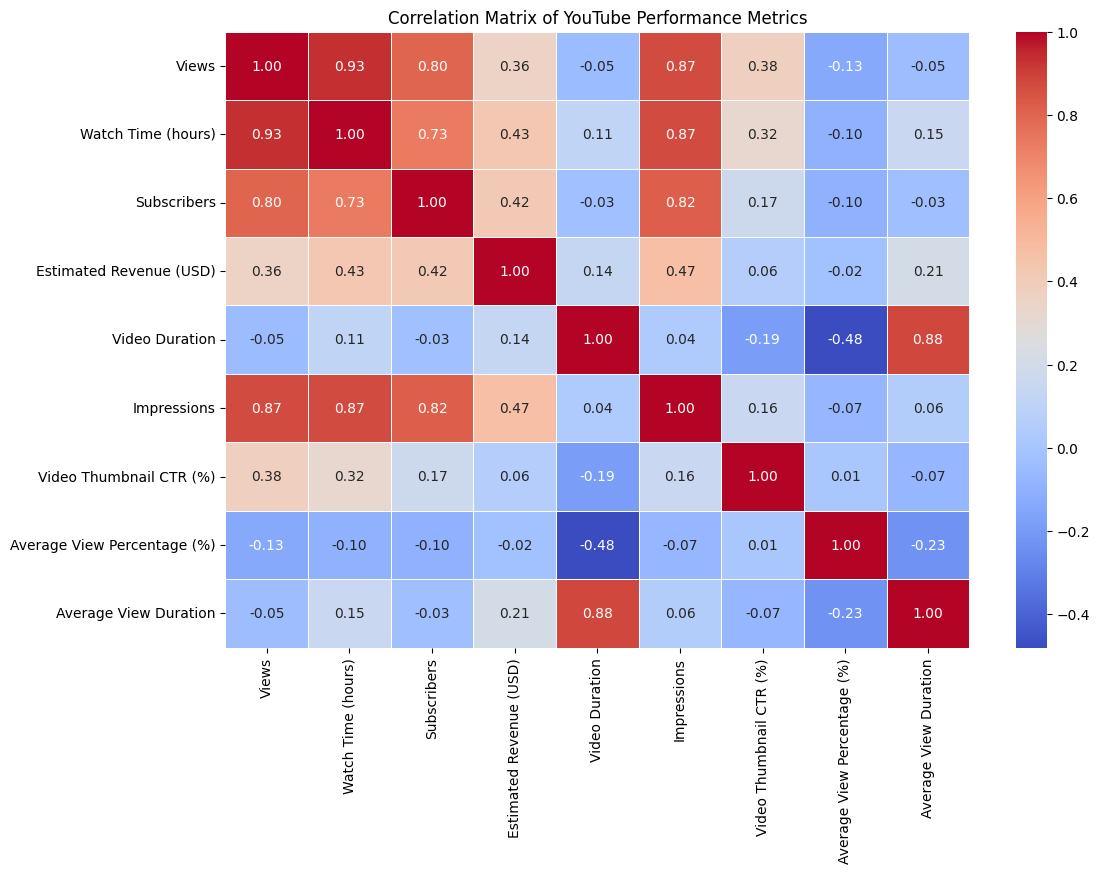

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of YouTube Performance Metrics')
plt.show()


Generate line plots to visualize the trends in average performance metrics over time by year, month, and day of the week using the previously created grouped dataframes.



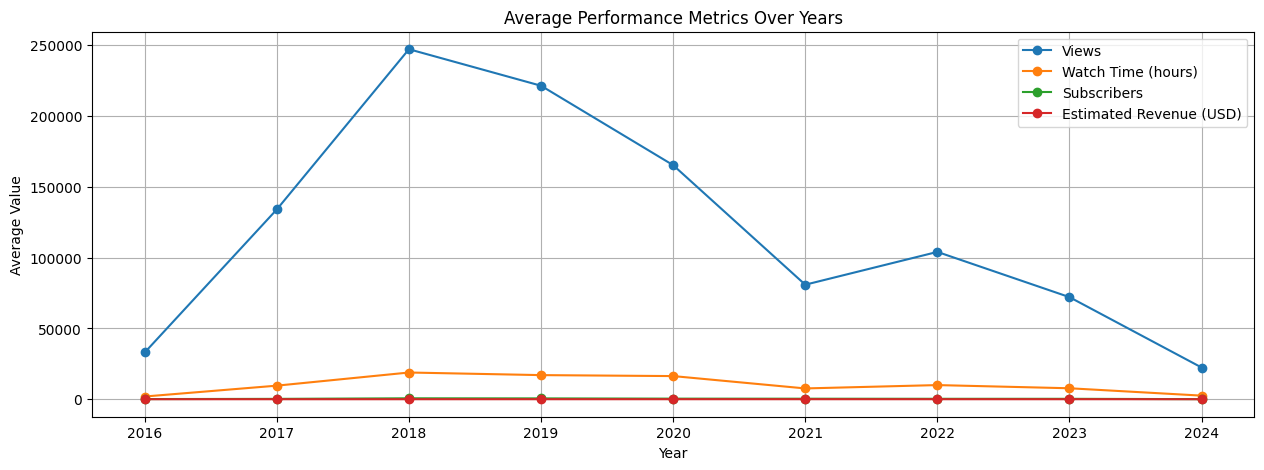

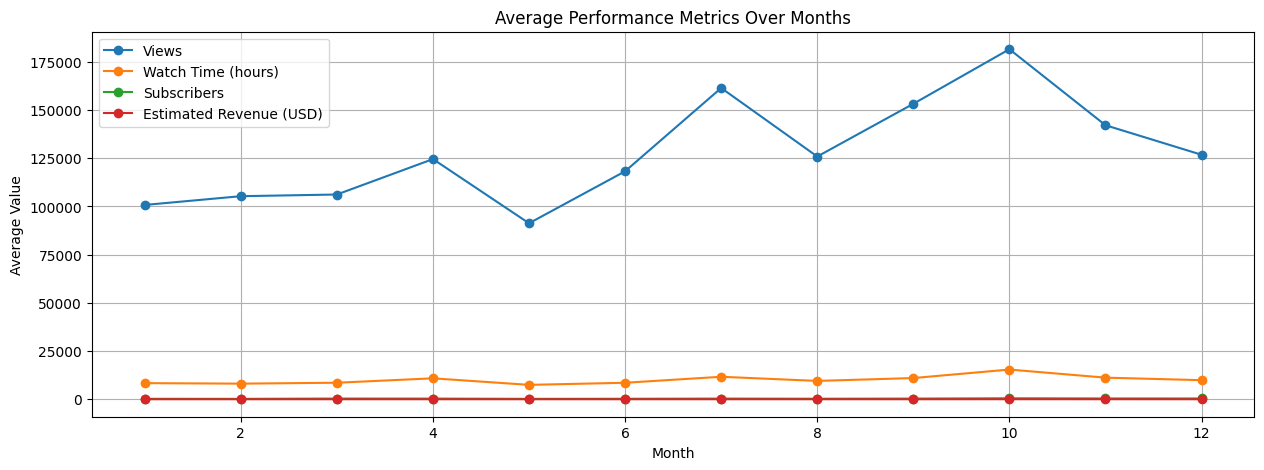

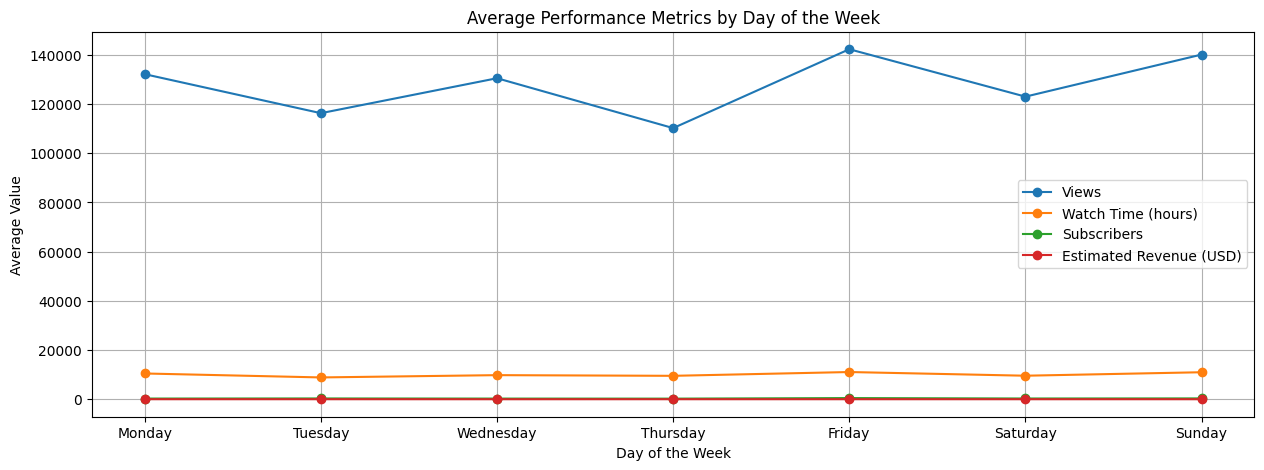

In [39]:
# Define the list of performance metrics to plot
performance_metrics_to_plot = ['Views', 'Watch Time (hours)', 'Subscribers', 'Estimated Revenue (USD)']

# Plot trends over the years
plt.figure(figsize=(15, 5))
for metric in performance_metrics_to_plot:
    plt.plot(avg_performance_by_year.index, avg_performance_by_year[metric], marker='o', label=metric)
plt.title('Average Performance Metrics Over Years')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot trends over the months
plt.figure(figsize=(15, 5))
for metric in performance_metrics_to_plot:
    plt.plot(avg_performance_by_month.index, avg_performance_by_month[metric], marker='o', label=metric)
plt.title('Average Performance Metrics Over Months')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot trends over the days of the week
plt.figure(figsize=(15, 5))
for metric in performance_metrics_to_plot:
    plt.plot(avg_performance_by_day_of_week.index, avg_performance_by_day_of_week[metric], marker='o', label=metric)
plt.title('Average Performance Metrics by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()


The previous step plotted trends over time. Since 'Day of Week' was identified as a relevant categorical column in the analysis phase and its average performance was calculated, generate bar plots to visualize the average performance metrics for each day of the week, as instructed in step 3.



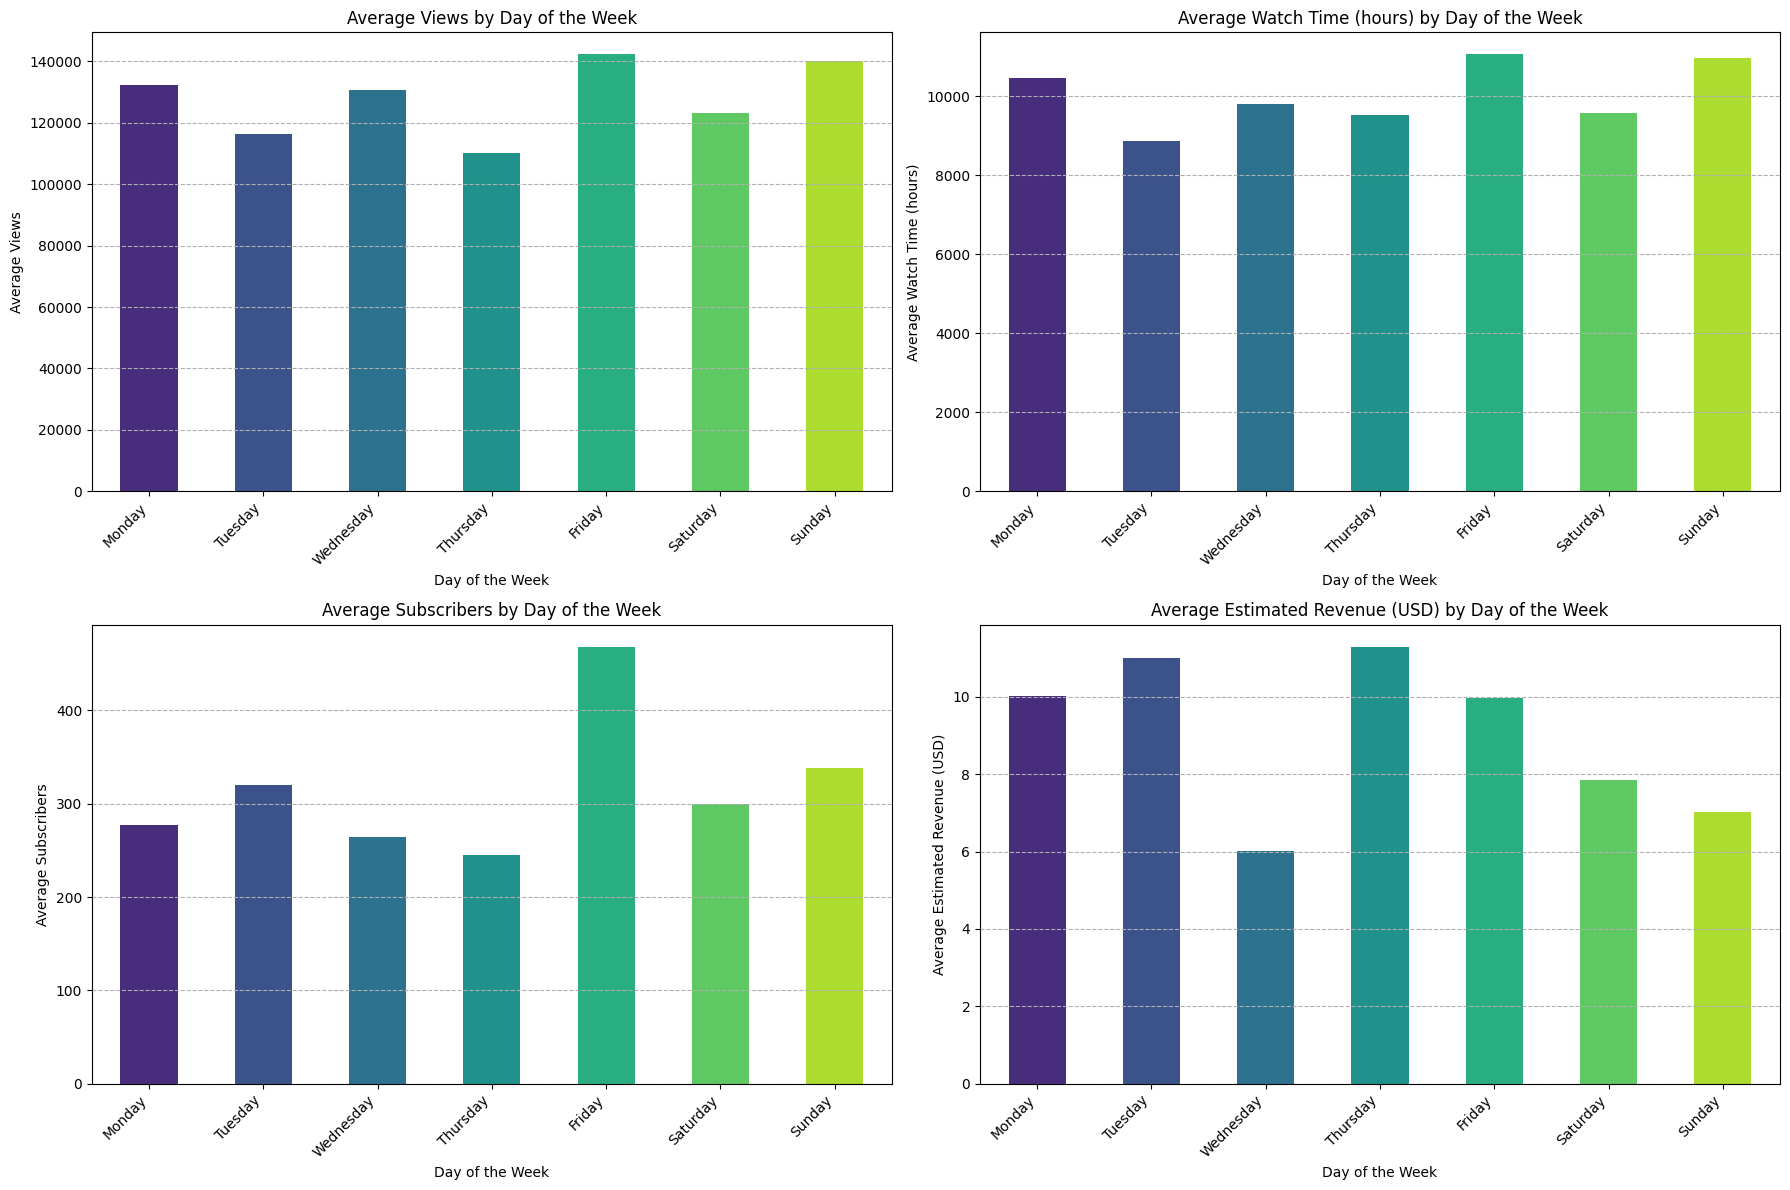

In [40]:
# Plot bar plots for average performance by Day of Week for key metrics
metrics_for_bar_plot = ['Views', 'Watch Time (hours)', 'Subscribers', 'Estimated Revenue (USD)']
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(18, 12))

for i, metric in enumerate(metrics_for_bar_plot):
    plt.subplot(2, 2, i + 1) # Create a 2x2 grid of subplots
    avg_performance_by_day_of_week[metric].plot(kind='bar', color=sns.color_palette('viridis', len(days_order)))
    plt.title(f'Average {metric} by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel(f'Average {metric}')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.grid(axis='y', linestyle='--')

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

In [41]:
# Top Performers by Revenue

# Sort the DataFrame by 'Estimated Revenue (USD)' in descending order and select the top 10
top_revenue_videos = df.sort_values(by='Estimated Revenue (USD)', ascending=False)

# Display the top 10 videos by estimated revenue (you can adjust the number as needed)
print("Top 10 Videos by Estimated Revenue (USD):")
display(top_revenue_videos[['ID', 'Estimated Revenue (USD)', 'Views', 'Subscribers']].head(10))

Top 10 Videos by Estimated Revenue (USD):


,ID,Estimated Revenue (USD),Views,Subscribers
228,228,103.117,670990.0,3538.0
257,257,83.979,241060.0,1125.0
251,251,80.265,343319.0,1437.0
289,289,70.247,99196.0,350.0
278,278,65.978,188324.0,1824.0
260,260,62.047,302999.0,866.0
293,293,59.058,101025.0,602.0
294,294,55.040,67556.0,581.0
290,290,50.344,89284.0,995.0
284,284,44.228,93487.0,305.0


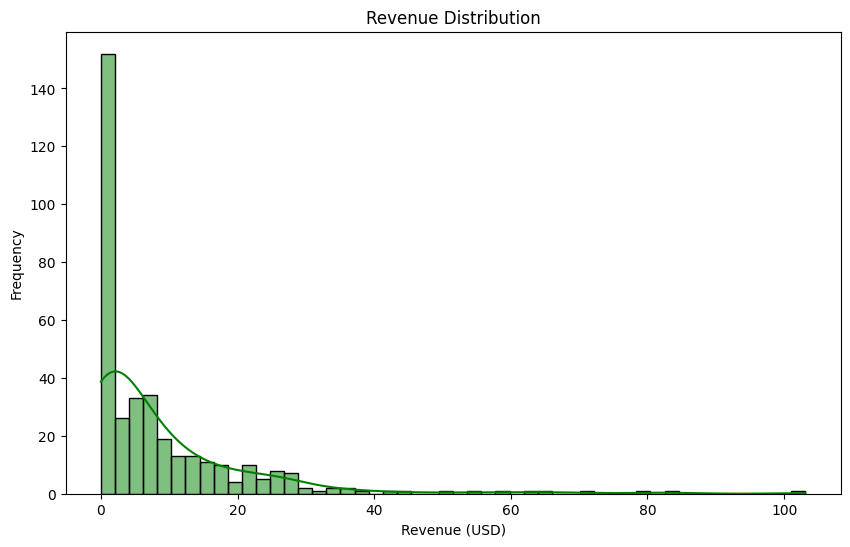

In [42]:
#Revenue Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Revenue (USD)'], bins=50,
kde=True, color='green')
plt.title("Revenue Distribution")
plt.xlabel("Revenue (USD)")
plt.ylabel("Frequency")
plt.show()


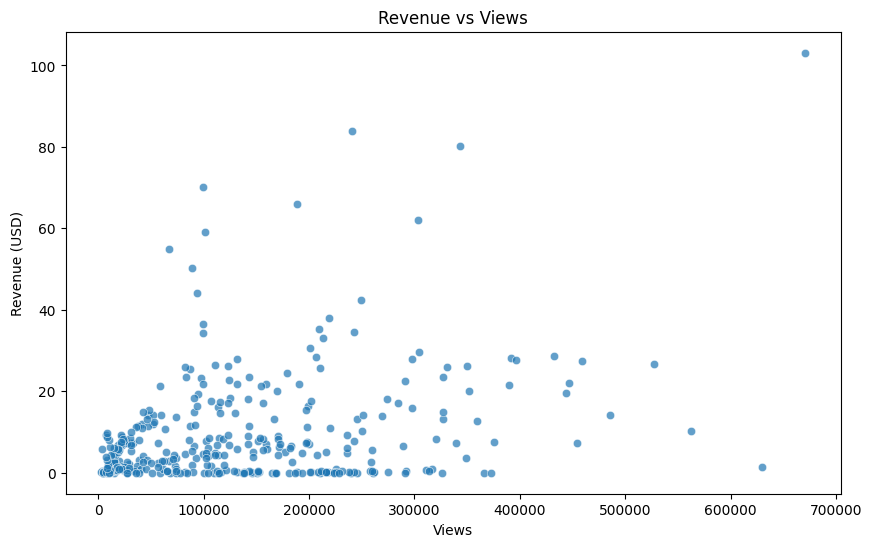

In [43]:
# Revenue vs Views
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Views'], y=df['Estimated Revenue (USD)'], alpha=0.7)
plt.title("Revenue vs Views")
plt.xlabel("Views")
plt.ylabel("Revenue (USD)")
plt.show()

In [44]:
# Feature Engineering
# Create new features:

# Create revenue per view
df['Revenue per View'] = df['Estimated Revenue (USD)'] / df['Views']

# Create engagement rate
df['Engagement Rate'] = (df['Likes'] + df['Shares'] + df['New Comments']) / df['Views'] * 100

# Predictive modeling

In [45]:
# Develop a predictive model to estimate revenue or subscribers based on the provided dataset.

# Develop a linear regression model to predict 'Estimated Revenue (USD)' using relevant performance metrics as features.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

In [46]:
# Define features (X) and target (y)
# Selecting relevant numerical features that showed correlation with revenue
features = ['Views', 'Watch Time (hours)', 'Subscribers', 'Video Duration', 'Impressions', 'Video Thumbnail CTR (%)', 'Average View Percentage (%)', 'Average View Duration', 'Revenue per View', 'Engagement Rate']
target = 'Estimated Revenue (USD)'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [48]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred) # Calculate RMSE
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Optionally, print the model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")

print(f"\nIntercept: {model.intercept_:.2f}") # Changed model.intercept to model.intercept_


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 106.73
Root Mean Squared Error (RMSE): 10.33
R-squared (R2): -0.23

Model Coefficients:
Views: -0.00
Watch Time (hours): 0.00
Subscribers: 0.01
Video Duration: -0.01
Impressions: 0.00
Video Thumbnail CTR (%): -0.05
Average View Percentage (%): -0.13
Average View Duration: 0.00
Revenue per View: 50288.99
Engagement Rate: -0.56

Intercept: 15.86


In [49]:
# Initialize and train the Random Forest Regressor model
# You can tune hyperparameters like n_estimators (number of trees)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [50]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf) # RMSE is the square root of MSE
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

# You can also get feature importances from tree-based models
print("\nFeature Importances (Random Forest):")
feature_importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
print(feature_importances)


Random Forest Regressor Model Evaluation:
Mean Squared Error (MSE): 6.49
Root Mean Squared Error (RMSE): 2.55
R-squared (R2): 0.93

Feature Importances (Random Forest):
Revenue per View               0.394507
Subscribers                    0.235948
Impressions                    0.138946
Watch Time (hours)             0.096377
Views                          0.084076
Engagement Rate                0.013641
Video Thumbnail CTR (%)        0.011911
Average View Duration          0.010354
Average View Percentage (%)    0.007971
Video Duration                 0.006271
dtype: float64


In [51]:
# Initialize and train the Gradient Boosting Regressor model
# You can tune hyperparameters like n_estimators, learning_rate, max_depth, etc.
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test)

In [52]:
# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("\nGradient Boosting Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_gbr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr:.2f}")
print(f"R-squared (R2): {r2_gbr:.2f}")

# Get feature importances
print("\nFeature Importances (Gradient Boosting):")
feature_importances_gbr = pd.Series(gbr_model.feature_importances_, index=features).sort_values(ascending=False)
print(feature_importances_gbr)


Gradient Boosting Regressor Model Evaluation:
Mean Squared Error (MSE): 3.03
Root Mean Squared Error (RMSE): 1.74
R-squared (R2): 0.97

Feature Importances (Gradient Boosting):
Revenue per View               0.366819
Subscribers                    0.329784
Impressions                    0.121353
Views                          0.099915
Watch Time (hours)             0.055956
Video Thumbnail CTR (%)        0.013287
Average View Percentage (%)    0.011167
Engagement Rate                0.000909
Average View Duration          0.000596
Video Duration                 0.000214
dtype: float64


In [53]:
# Import the Support Vector Regressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [54]:
# Initialize and train the Support Vector Regressor model
# SVR is sensitive to feature scaling, so it's good practice to scale the features.
# We can use a pipeline to combine scaling and the SVR model.
svr_model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)) # You can tune C and epsilon

# Fit the model on the training data
# The pipeline handles the scaling internally
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

In [55]:
# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\nSupport Vector Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.2f}")
print(f"R-squared (R2): {r2_svr:.2f}")


Support Vector Regressor Model Evaluation:
Mean Squared Error (MSE): 54.52
Root Mean Squared Error (RMSE): 7.38
R-squared (R2): 0.37


In [56]:
# Import the K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [57]:
# Initialize and train the K-Nearest Neighbors Regressor model
# KNN is sensitive to feature scaling, so it's good practice to scale the features.
# We can use a pipeline to combine scaling and the KNN model.
knn_model = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))

# Fit the model on the training data
# The pipeline handles the scaling internally
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

In [58]:
# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nK-Nearest Neighbors Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")
print(f"R-squared (R2): {r2_knn:.2f}")

# Note: KNN models do not have a concept of feature importance in the same way as linear or tree models.


K-Nearest Neighbors Regressor Model Evaluation:
Mean Squared Error (MSE): 62.69
Root Mean Squared Error (RMSE): 7.92
R-squared (R2): 0.28


## Summary:

### Data Analysis Key Findings

*   Core metrics like Views, Watch Time, Subscribers, and Impressions are strongly positively correlated.
*   Estimated Revenue has moderate positive correlations with Views, Watch Time, and Subscribers.
*   Video Thumbnail CTR (%) shows a moderate positive correlation with Views, indicating its importance for initial engagement.
*   Video Duration is strongly positively correlated with Average View Duration but moderately negatively correlated with Average View Percentage.
*   Performance metrics generally increased over the years but show a dip in the most recent partial year (2024).
*   Monthly variations in performance are observed, with potentially higher averages in October and November for some metrics.
*   Fridays and Sundays tend to have higher average Views and Watch Time compared to other days of the week.
*   Analysis of average performance by Publish Hour was inconclusive based on the provided data.


Based on the evaluation metrics, the **Gradient Boosting Regressor** is the best performing model among those tested. It exhibits the lowest **Mean Squared Error (MSE)** (3.03) and **Root Mean Squared Error (RMSE)** (1.74), indicating the smallest average prediction errors. Furthermore, its **R-squared (R2)** value of 0.97 is the highest, meaning it explains 97% of the variance in the target variable (Estimated Revenue), which signifies a strong fit to the data. The **Random Forest Regressor** is also a good performer with a high R2 (0.93) and relatively low error metrics, but Gradient Boosting is slightly superior. Linear Regression performs poorly with a negative R2, suggesting it's a bad fit, while SVR and KNN show moderate performance but are significantly less accurate than the tree-based models.